<center> 
    <h1> Toronto Crime </h1>
<h3> Sprint 2</h3>
<h3> Advanced EDA</h3>
    </center>

##### Author: Arsalan Arif Radhu
##### Date: 1 November 2023

### Table of Contents:
- [Introduction](#intro) <br />
- [Basic Cleaning](#part1) <br />

### Introduction <a id="intro" /> 

Importing all the required libraries.

In [2]:
import numpy as np  #importing numpy library
import pandas as pd #importing pandas library
import matplotlib.pyplot as plt #importing matplotlib library
import seaborn as sns #importing seaborn library 

This notebook aims to conduct some basic EDA for the cleaned dataset.

Importing our data and reading through it.

In [21]:
#Reading the csv file
final_df = pd.read_csv('../Data/FinalData.csv',low_memory=False, index_col=0)
pd.set_option('display.max_columns', None)
final_df

,CRIME_TYPE,EVENT_UNIQUE_ID,REPORT_DATE_FIXED,OCC_DATE_FIXED,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW,OCC_HOUR,DIVISION,LOCATION_TYPE,PREMISES_TYPE,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,PRIMARY_OFFENCE,STATUS,HOMICIDE_TYPE,DEATH,INJURIES
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Assualt,GO-20141262074,2014-01-01,1998-06-01,2014.0,January,1.0,1.0,Wednesday,12.0,NaN,NaN,NaN,NaN,NaN,12.0,D32,"Apartment (Rooming House, Condo)",Apartment,1480.0,110.0,Administering Noxious Thing,Assault,38,Lansing-Westgate,-79.425896,43.757346,NotApplicable,NotApplicable,NotApplicable,0,0
2,Assualt,GO-20141260889,2014-01-01,2014-01-01,2014.0,January,1.0,1.0,Wednesday,4.0,2014.0,January,1.0,1.0,Wednesday,4.0,D51,"Apartment (Rooming House, Condo)",Apartment,1430.0,100.0,Assault,Assault,74,North St.James Town,-79.376497,43.666423,NotApplicable,NotApplicable,NotApplicable,0,0
3,Assualt,GO-20141261050,2014-01-01,2014-01-01,2014.0,January,1.0,1.0,Wednesday,4.0,2014.0,January,1.0,1.0,Wednesday,4.0,D54,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,1430.0,100.0,Assault,Assault,69,Blake-Jones,-79.344839,43.678946,NotApplicable,NotApplicable,NotApplicable,0,0
4,Assualt,GO-20141259344,2014-01-01,2014-01-01,2014.0,January,1.0,1.0,Wednesday,2.0,2014.0,January,1.0,1.0,Wednesday,2.0,D52,Bar / Restaurant,Commercial,1420.0,110.0,Assault Bodily Harm,Assault,164,Wellington Place,-79.391841,43.646639,NotApplicable,NotApplicable,NotApplicable,0,0
5,Assualt,GO-20141260537,2014-01-01,2014-01-01,2014.0,January,1.0,1.0,Wednesday,4.0,2014.0,January,1.0,1.0,Wednesday,4.0,NSA,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,1430.0,100.0,Assault,Assault,NSA,NSA,-85.488744,0.000000,NotApplicable,NotApplicable,NotApplicable,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62523,Break and Enter,GO-20222563482,2022-12-31,2022-12-29,2022.0,December,31.0,365.0,Saturday,21.0,2022.0,December,29.0,363.0,Thursday,15.0,D33,"Apartment (Rooming House, Condo)",Apartment,2120.0,210.0,Unlawfully In Dwelling-House,Break and Enter,150,Fenside-Parkwoods,-79.320955,43.760970,NotApplicable,NotApplicable,NotApplicable,0,0
62524,Break and Enter,GO-20222557270,2022-12-31,2022-12-31,2022.0,December,31.0,365.0,Saturday,0.0,2022.0,December,31.0,365.0,Saturday,0.0,D51,Other Commercial / Corporate Places (For Profi...,Commercial,2120.0,220.0,B&E W'Intent,Break and Enter,70,South Riverdale,-79.346659,43.639056,NotApplicable,NotApplicable,NotApplicable,0,0
62525,Break and Enter,GO-20222554300,2022-12-31,2022-12-22,2022.0,December,31.0,365.0,Saturday,10.0,2022.0,December,22.0,356.0,Thursday,8.0,D41,"Single Home, House (Attach Garage, Cottage, Mo...",House,2120.0,220.0,B&E W'Intent,Break and Enter,119,Wexford/Maryvale,-79.301740,43.736102,NotApplicable,NotApplicable,NotApplicable,0,0


After doing some basic EDA I realized that I would like to create a prediction model to predict the occurence of crimes in neighbourhoods.  

So doing some more EDA regarding relationship between Neighborhoods and Crimes.

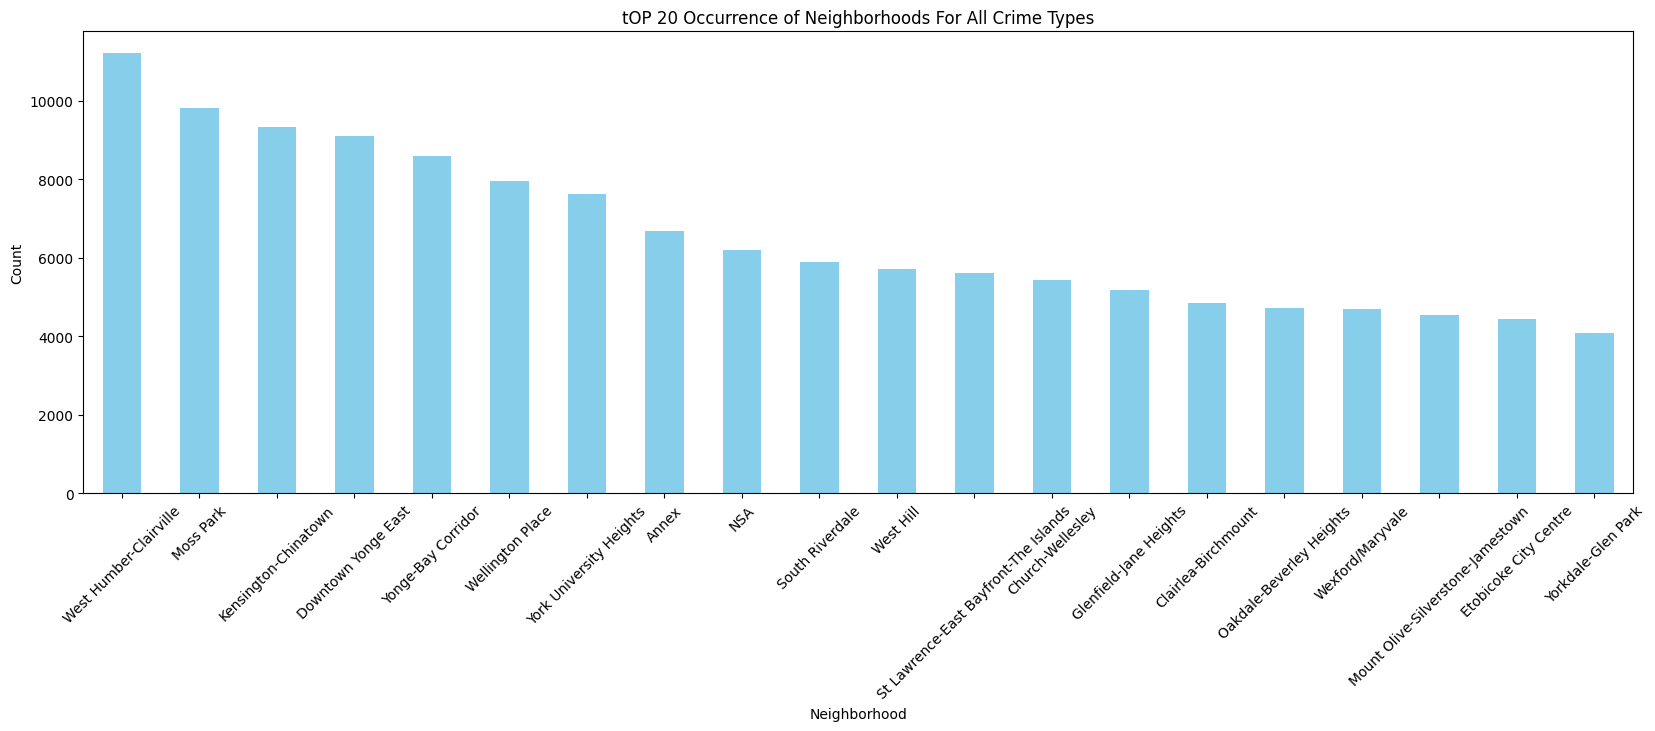

In [19]:
# Count occurrences of each neighborhood
neighborhood_counts = final_df['NEIGHBOURHOOD_158'].value_counts()

# Plotting the bar graph
neighborhood_counts.nlargest(20).plot(kind='bar', color='skyblue', figsize=(20,6))
plt.title('Top 20 Occurrence of Neighborhoods For All Crime Types')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

As we can observe that the neighbourhood of <b>West-Humber-Clairville</b> has the highest occurences meaning that it's the neighbourhood with the highest amount of crime occurences over the period of 2013-2022. Followed by West-Humberville-Clairville neighbourhood, the highest occuring neighbourhoods are <b>Moss Park</b> and <b>Kensington-Chinatown</b>.

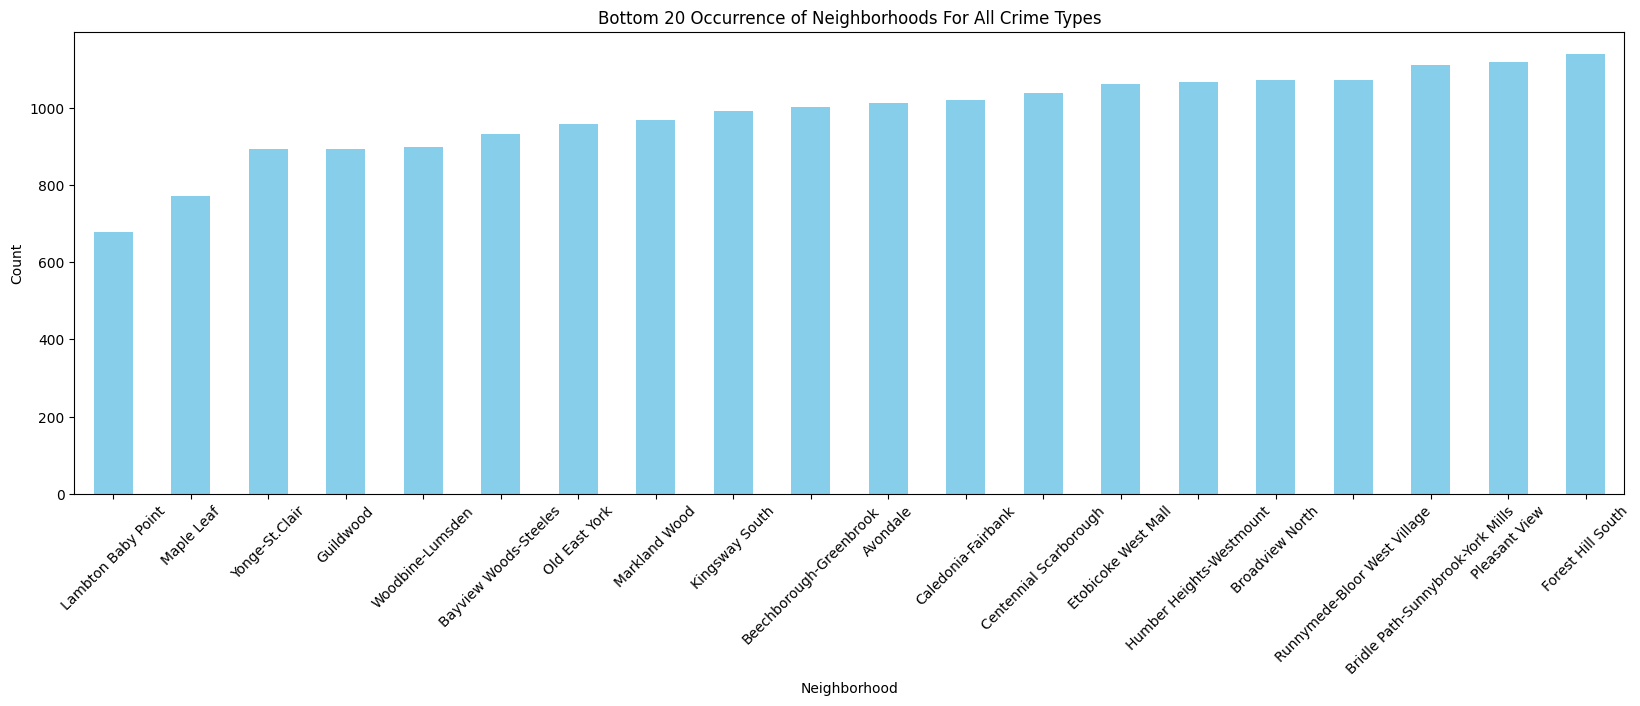

In [20]:
# Count occurrences of each neighborhood
neighborhood_counts = final_df['NEIGHBOURHOOD_158'].value_counts()

# Plotting the bar graph
neighborhood_counts.nsmallest(20).plot(kind='bar', color='skyblue', figsize=(20,6))
plt.title('Bottom 20 Occurrence of Neighborhoods For All Crime Types')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

In [22]:
final_df['DIVISION'].unique()

array(['D32', 'D51', 'D54', 'D52', 'NSA', 'D14', 'D53', 'D43', 'D13',
       'D22', 'D31', 'D33', 'D55', 'D41', 'D12', 'D11', 'D42', 'D23'],
      dtype=object)

In [28]:
# Count the occurrence of each division 
division_counts = final_df['DIVISION'].value_counts()
division_counts

DIVISION
D51    37075
D14    32304
D32    31528
D31    28148
D52    27877
D41    27639
D43    27146
D55    26871
D22    26230
D23    26121
D42    23337
D53    21891
D33    17793
D11    16996
D12    16701
D13    15011
D54     7775
NSA     3884
Name: count, dtype: int64

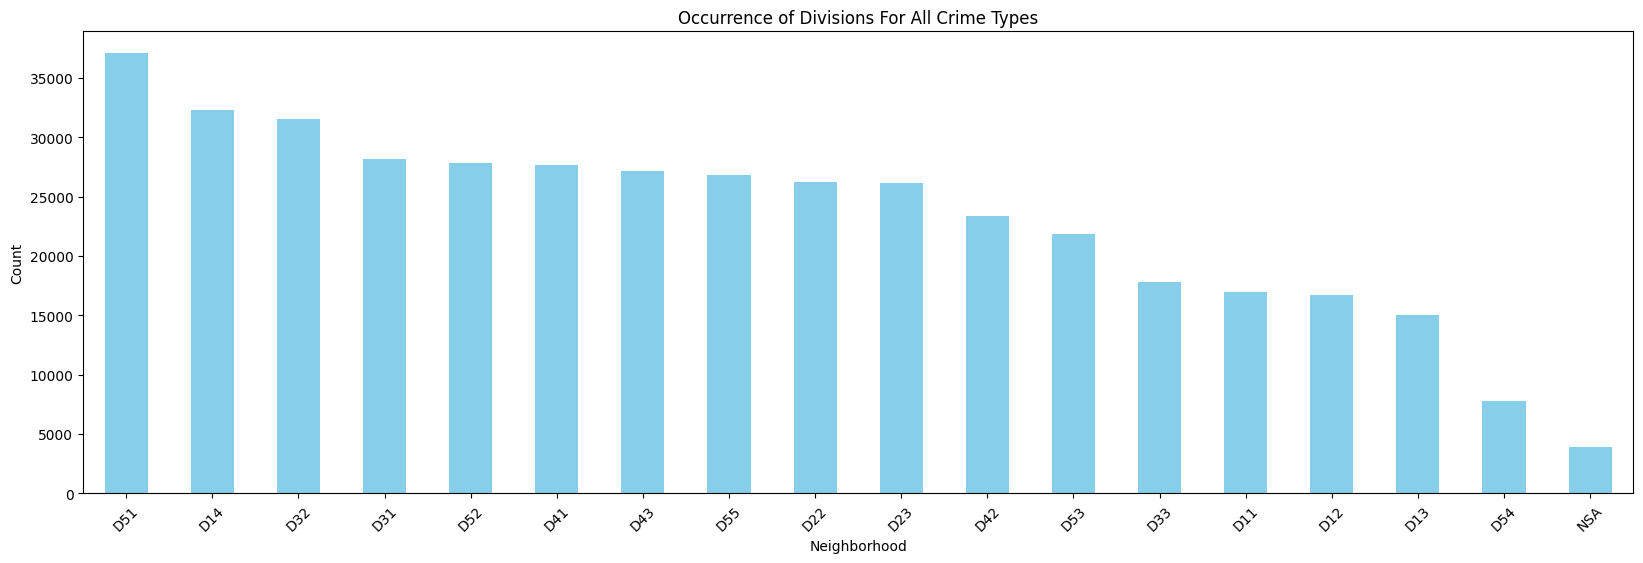

In [30]:
# Plotting the bar graph
division_counts.plot(kind='bar', color='skyblue', figsize=(20,6))
plt.title('Occurrence of Divisions For All Crime Types')
plt.xlabel('Division')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

As we can see we have neighbourhood codes of all the areas, but there is a code NSA which needs more investigation. 

In [34]:
final_df['CRIME_TYPE'].unique()

array(['Assualt', 'Theft', 'Homicide', 'Robbery', 'Shootings',
       'Break and Enter'], dtype=object)

In [35]:
crime_list = ['Assualt', 'Theft', 'Homicide', 'Robbery', 'Shootings',
       'Break and Enter']

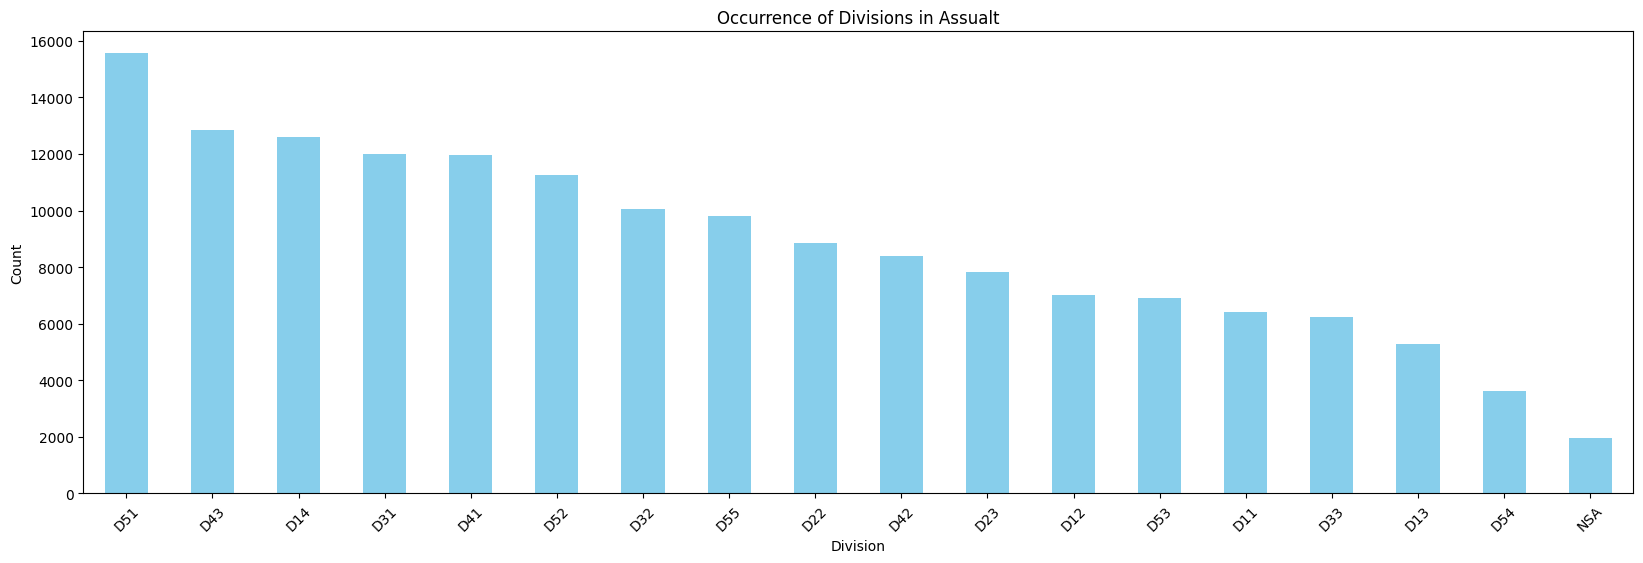

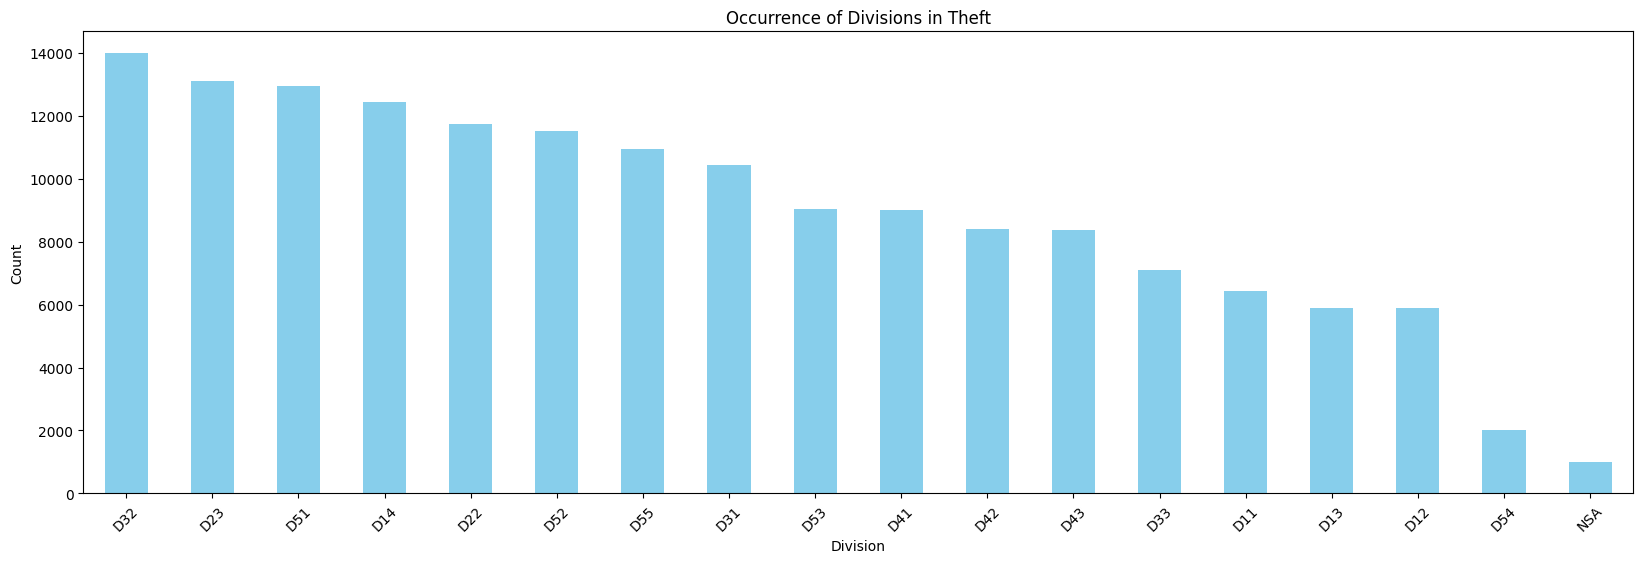

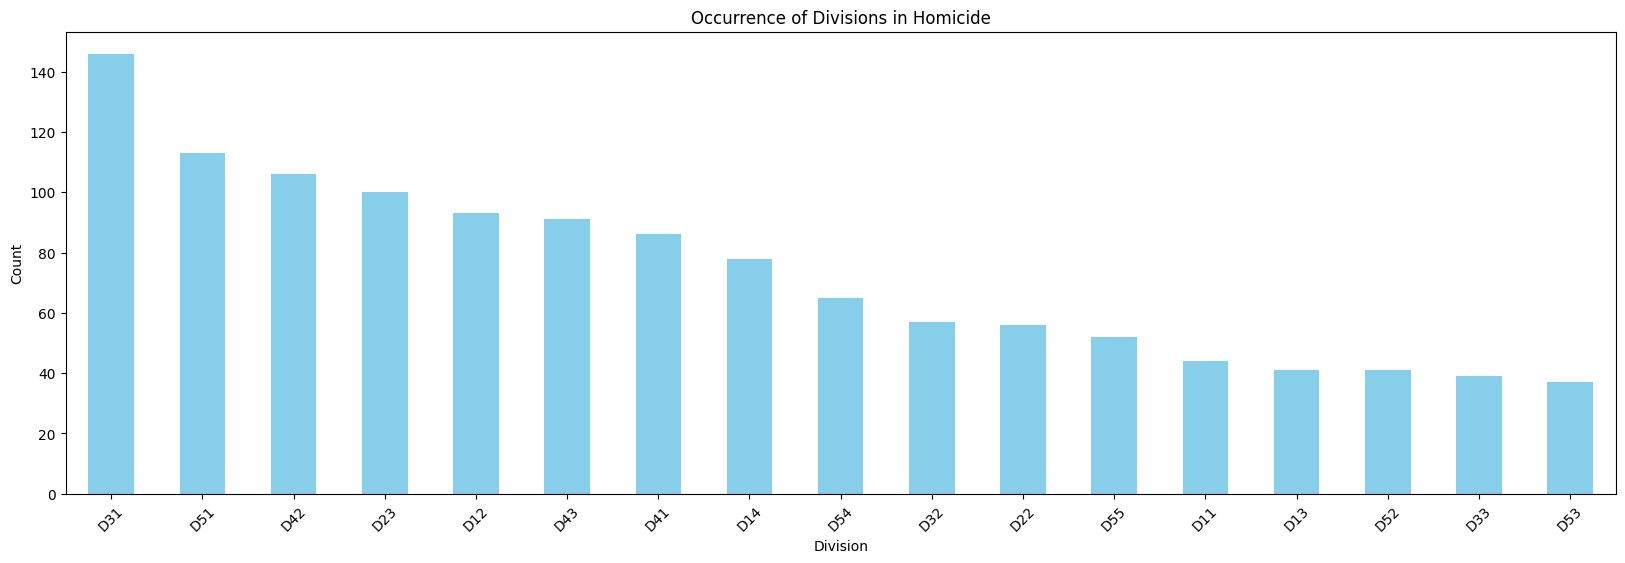

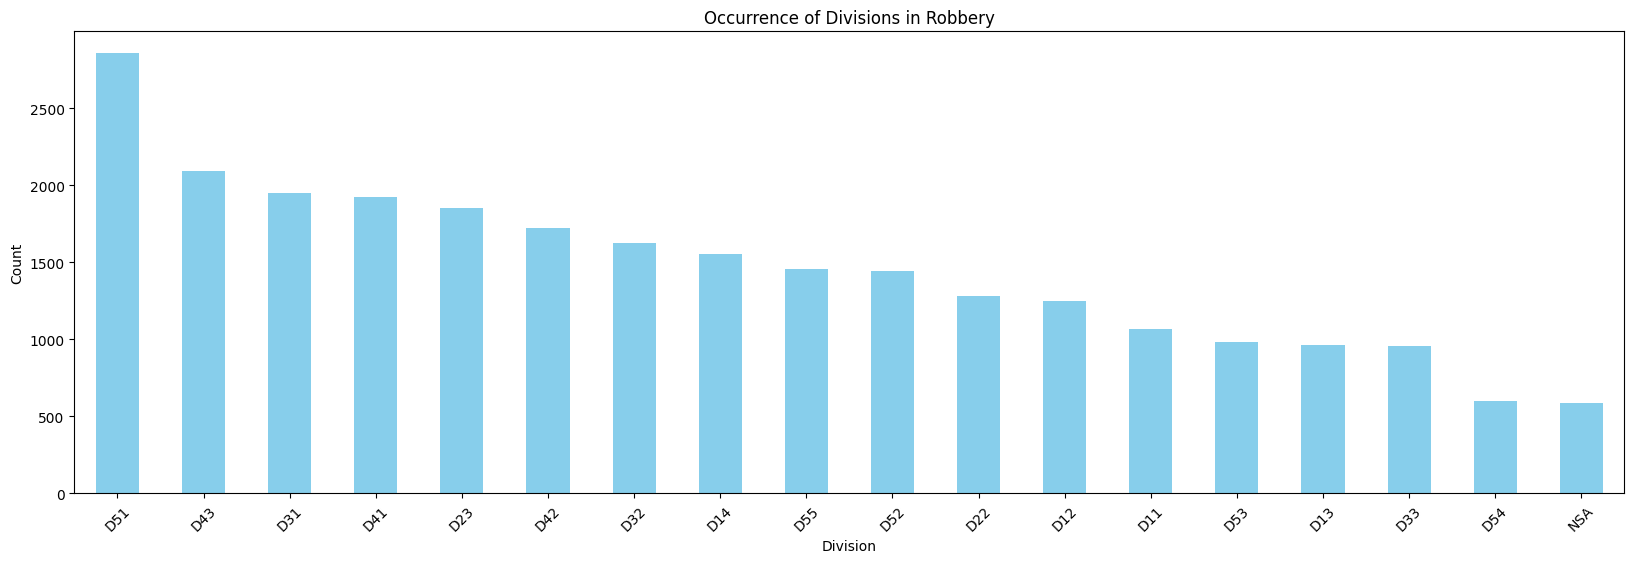

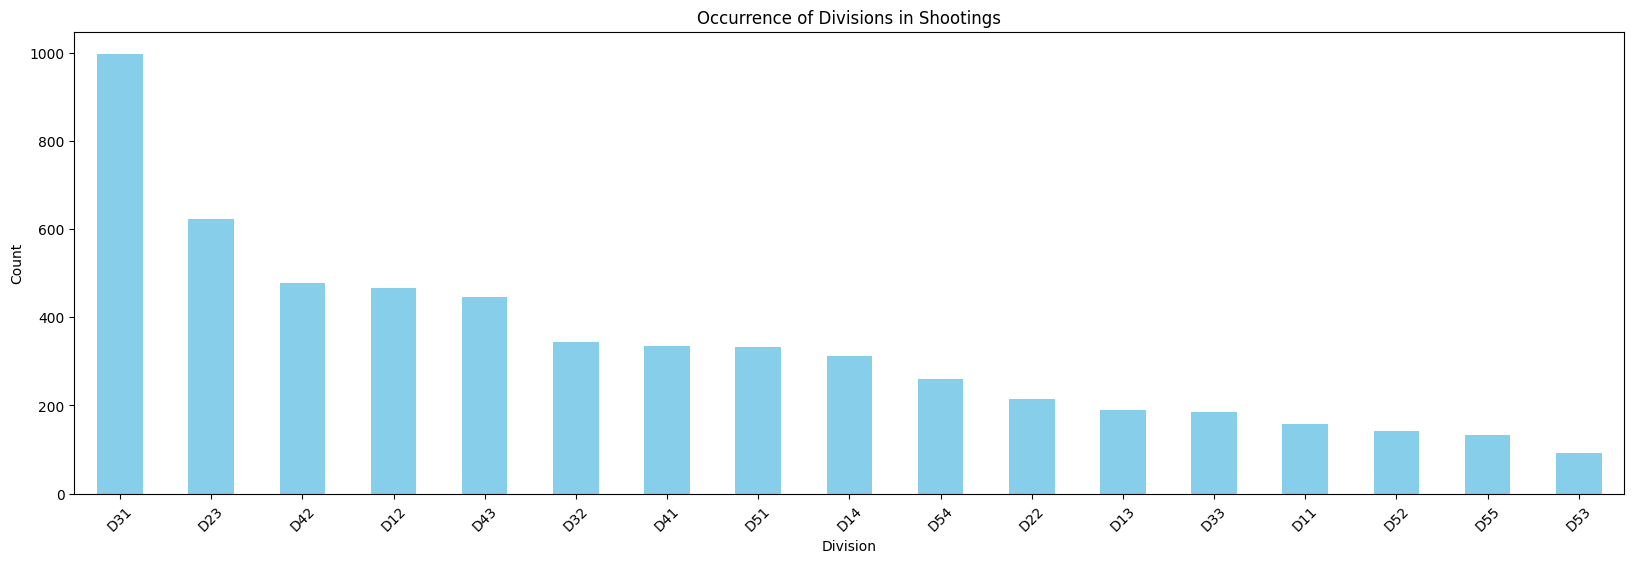

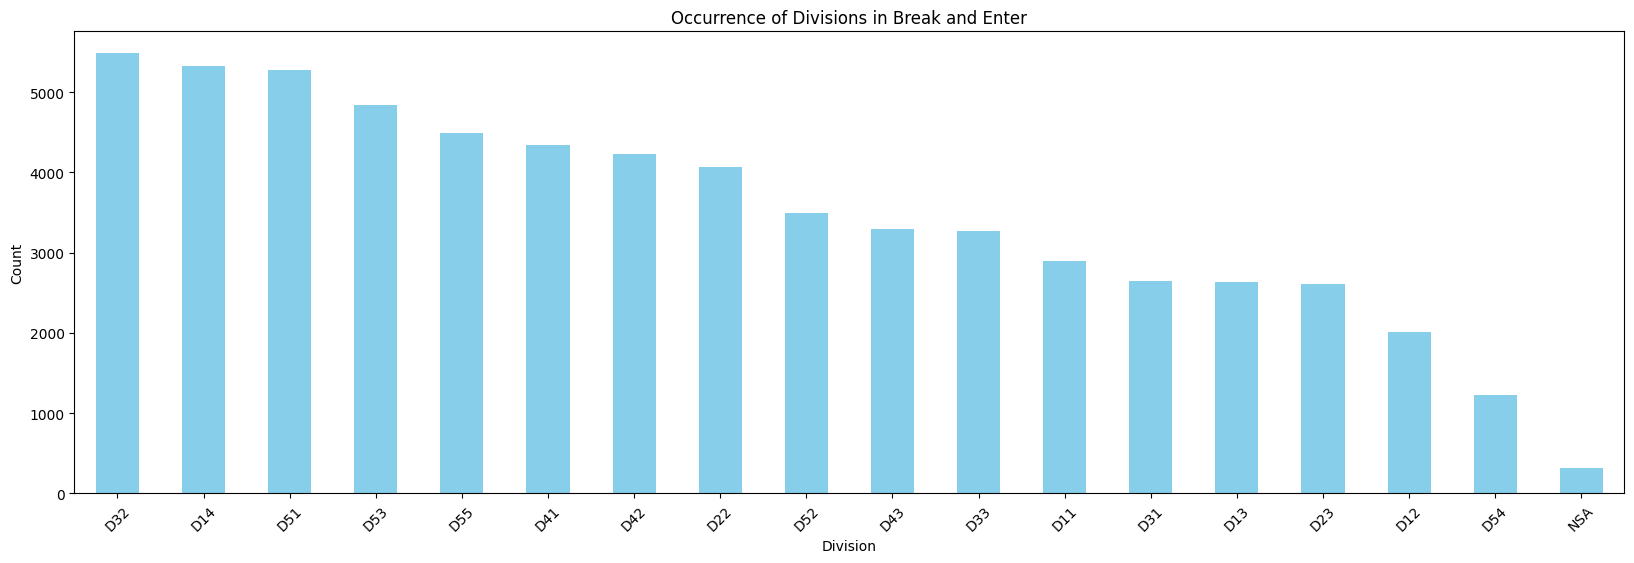

In [39]:
for crime_type in crime_list:
    # Filter final_df by the desired Crime_Type
    filtered_division_counts = final_df['DIVISION'][final_df['CRIME_TYPE'] == crime_type].value_counts()
    # Plotting the bar graph
    filtered_division_counts.plot(kind='bar', color='skyblue', figsize=(20,6))
    plt.title(f'Occurrence of Divisions in {crime_type}')
    plt.xlabel('Division')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  
    plt.show()

In [ ]:
final_df[final_df['HOOD_158'] == 'NSA']

,CRIME_TYPE,EVENT_UNIQUE_ID,REPORT_DATE_FIXED,OCC_DATE_FIXED,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,PRIMARY_OFFENCE,STATUS,HOMICIDE_TYPE,DEATH,INJURIES
OBJECTID,,,,,,,,,,,,,,,,,,,,,
5,Assualt,GO-20141260537,2014-01-01,2014-01-01,2014.0,January,1.0,1.0,Wednesday,4.0,...,Assault,NSA,NSA,-85.488744,0.000000,NotApplicable,NotApplicable,NotApplicable,0,0
129,Assualt,GO-20142552857,2014-01-03,2013-01-03,2014.0,January,3.0,3.0,Friday,11.0,...,Assault,NSA,NSA,-79.723361,43.658652,NotApplicable,NotApplicable,NotApplicable,0,0
162,Assualt,GO-20141283403,2014-01-04,2014-01-04,2014.0,January,4.0,4.0,Saturday,23.0,...,Assault,NSA,NSA,-85.488744,0.000000,NotApplicable,NotApplicable,NotApplicable,0,0
196,Assualt,GO-20141285582,2014-01-05,2012-01-01,2014.0,January,5.0,5.0,Sunday,11.0,...,Assault,NSA,NSA,-79.316266,43.824932,NotApplicable,NotApplicable,NotApplicable,0,0
202,Assualt,GO-20141287665,2014-01-05,2014-01-05,2014.0,January,5.0,5.0,Sunday,18.0,...,Assault,NSA,NSA,-85.488744,0.000000,NotApplicable,NotApplicable,NotApplicable,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61807,Break and Enter,GO-20222272856,2022-11-22,2022-11-21,2022.0,November,22.0,326.0,Tuesday,15.0,...,Break and Enter,NSA,NSA,-85.488744,0.000000,NotApplicable,NotApplicable,NotApplicable,0,0
61841,Break and Enter,GO-20222290886,2022-11-24,2022-11-16,2022.0,November,24.0,328.0,Thursday,11.0,...,Break and Enter,NSA,NSA,-85.488744,0.000000,NotApplicable,NotApplicable,NotApplicable,0,0
61875,Break and Enter,GO-20222299326,2022-11-25,2022-11-24,2022.0,November,25.0,329.0,Friday,13.0,...,Break and Enter,NSA,NSA,-85.488744,0.000000,NotApplicable,NotApplicable,NotApplicable,0,0


There are 6190 rows with NSA Neighbourhood code.